In [ ]:
#Overfitting is an undesirable machine learning behavior that occurs when the machine 
#learning model gives accurate predictions
#for training data but not for new data.

In [ ]:
#Linear Regression: Focuses on prediction and implies a relationship where one variable affects another.
#Correlation: Focuses on measuring the strength and direction of a relationship without assuming causation.

In [ ]:
# Exercise 1: Feature Selection with SelectKBest
# Objective: Use SelectKBest from scikit-learn to select the top k features from a dataset.
# Load the Iris dataset from scikit-learn.
# Split the dataset into features and target variable.
# Use SelectKBest with the chi2 score function to select the top 2 features.
# Print the selected feature names.


In [ ]:
#features represent the input data points or independent variables used to describe various aspects of the object under study.
#Targets, on the other hand, are the output or dependent variables that the model aims to predict or classify based on the 
#input features.
#The chi2 score function measures the dependence between categorical features and a target variable.
#It's used in feature selection to rank features by their relevance, typically for classification tasks.
#Feature selection is the process of choosing the most important features in a dataset that have the highest impact on the target variable. In this context, it helps improve model performance, reduce overfitting, 
#and speed up training by keeping only relevant features.

In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

iris = load_iris()
X, y = iris.data, iris.target

#create a df
feature_names = iris.feature_names

#  select the top 2 features
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

selected_features_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_features_indices]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['petal length (cm)', 'petal width (cm)']


In [ ]:
# Exercise 2: Feature Importance with Random Forest
# Objective: Use a Random Forest classifier to determine feature importance.
# Load the Wine dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Train a Random Forest classifier on the training data.
# Extract and visualize feature importances.


In [ ]:
# Random forest is a commonly-used ML algorithm,
# that combines the output of multiple decision trees to reach a single result. 

In [8]:
# # A decision tree is a flowchart-like structure used for classification or regression tasks.
# # It splits data into branches based on feature values, leading to decision nodes and final predictions (leaves).
#           Is it warm-blooded?
#              /           \
#            Yes            No
#            /               \
#    Does it lay eggs?      Reptile
#         /     \
#       Yes      No
#      /          \
#    Bird       Mammal


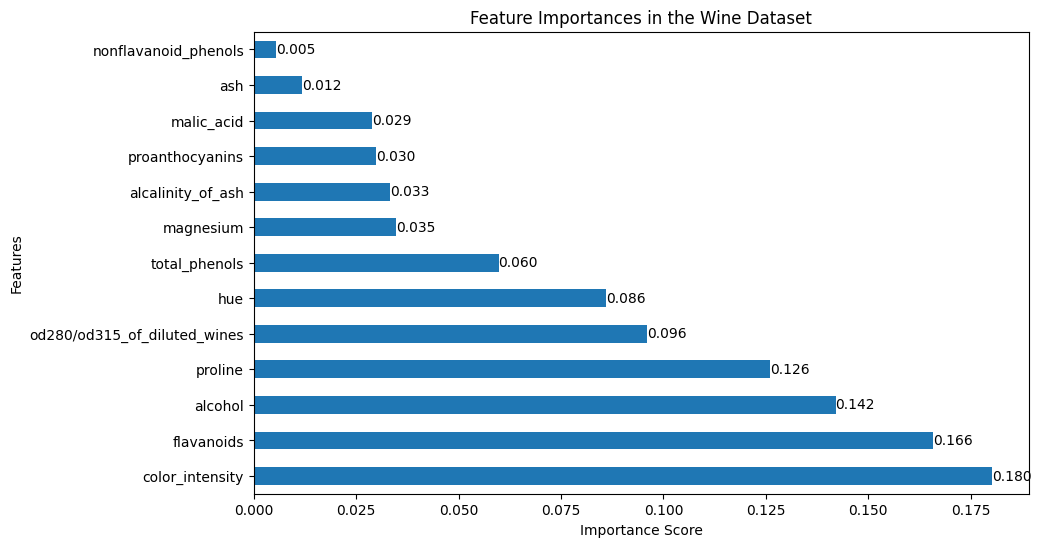

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#train a Random Forest classifier on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#extract feature importances
importances = rf.feature_importances_

#vsualize feature importances
feature_names = wine.feature_names
feature_importances = pd.Series(importances, index=feature_names)

# sort and plot feature importances
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = feature_importances.plot(kind='barh')  # Horizontal bar plot

# add values to the bars
for bar in bars.patches:
    plt.text(
        bar.get_width(),  # x position
        bar.get_y() + bar.get_height() / 2,  # y position
        f'{bar.get_width():.3f}',  # value formatted to 3 decimal places
        va='center',  # align text vertically
        ha='left'     # align text horizontally
    )

plt.title('Feature Importances in the Wine Dataset')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# Exercise 3: Recursive Feature Elimination (RFE)
# Objective: Use Recursive Feature Elimination (RFE) to select features and evaluate model performance.
# Load the Breast Cancer dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Use RFE with a Support Vector Machine (SVM) classifier to select features.
# Train an SVM model with the selected features and evaluate its performance.


In [10]:
# Recursive Feature Elimination (RFE) is a feature selection technique
# that recursively removes the least important features from a dataset. 
# When using an SVM classifier with RFE, features are ranked based on their contribution to the model,
# helping to identify the most relevant features for classification tasks.
#Feature Importance Scores: SVMs can provide coefficients for linear models, where the absolute value of the coefficients indicates the importance of each feature. 
#Higher absolute values suggest greater contribution.
#Performance Metrics: After training the model, RFE evaluates the model’s performance (e.g., accuracy, F1-score)
#using the current set of features. If removing a feature results in a decrease in performance, that feature is 
#considered more important.

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# use RFE with SVM to select features
svm = SVC(kernel="linear") 
rfe = RFE(estimator=svm, n_features_to_select=5) 
rfe.fit(X_train, y_train)


selected_features = rfe.support_  # boolean mask of selected features
selected_feature_names = np.array(data.feature_names)[selected_features]
print("Selected features:", selected_feature_names)

#train an SVM model with the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

svm.fit(X_train_rfe, y_train)

#evaluate model performance
y_pred = svm.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Selected features: ['mean concave points' 'radius error' 'worst concavity'
 'worst concave points' 'worst symmetry']
Accuracy: 0.9298
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [12]:
# Exercise 4: L1 Regularization for Feature Selection
# Objective: Use L1 regularization (Lasso) for feature selection.
# Load the Diabetes dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Apply Lasso regression for feature selection.
# Train a model using selected features and evaluate its performance.


In [ ]:
# L1 regularization decides which coefficients become zero based on the optimization
#process that balances fitting the training data with penalizing large coefficients.
#Features that contribute less to reducing the loss are more likely to be eliminated.
#The strength of the penalty, controlled by the hyperparameter 
# 𝛼
# α, plays a crucial role in this decision-making process.

In [ ]:
# A loss function (also known as a cost function or error function) is a mathematical function 
# used in machine learning and statistics to quantify how well a model's predictions match the actual data.
# It measures the difference between the predicted values produced by the model and the actual target values
# from the dataset. The goal of training a model is to minimize this loss function.

In [ ]:
# L1 regularization (Lasso) is a powerful tool for feature selection due to its ability 
# to produce sparse models by setting some feature coefficients to zero. This property distinguishes
# it from other feature selection methods and regularization techniques, 
# making it particularly useful in scenarios with many features and potential overfitting.

In [ ]:
# sparsity in the model refers to having only a few non-zero coefficients, 
# achieved through techniques like L1 regularization. This characteristic helps
# improve the model's interpretability, reduces overfitting,
# and increases computational efficiency by focusing on the most important features.

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#apply Lasso regression for feature selection
lasso = Lasso(alpha=0.1)  # regularization strength
lasso.fit(X_train, y_train)
selected_features = np.abs(lasso.coef_) > 1e-5  # threshold to determine selected features
selected_feature_names = np.array(data.feature_names)[selected_features]
print("Selected features:", selected_feature_names)

#train a model using selected features
X_train_lasso = X_train[:, selected_features]
X_test_lasso = X_test[:, selected_features]
# train the Lasso model
lasso.fit(X_train_lasso, y_train)
# evaluate model performance
y_pred = lasso.predict(X_test_lasso)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Selected features: ['sex' 'bmi' 'bp' 's1' 's3' 's5' 's6']
Mean Squared Error: 2775.1841
R-squared: 0.4859


# Classification Exercises


In [ ]:
# Exercise 1: Logistic Regression
# Objective: Build a logistic regression model to classify data.
# Load the Iris dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Train a logistic regression model on the training set.
# Evaluate the model's performance on the test set using accuracy and a confusion matrix.


In [ ]:
# Logistic regression estimates the probability of an event occurring,
# such as voted or didn't vote, based on a given data set of independent variables.

In [14]:
# A confusion matrix is a table that is used to define the performance of a classification algorithm.
# A confusion matrix visualizes and summarizes the performance of a classification algorithm.

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


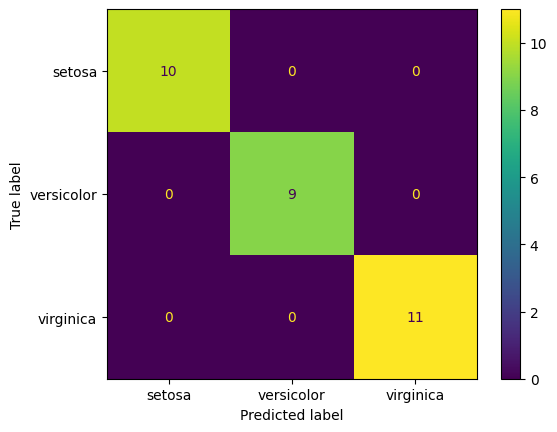

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


iris = load_iris()
X = iris.data  
y = iris.target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a logistic regression model on the training set
model = LogisticRegression(max_iter=200)  # increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names).plot()


In [ ]:
# Exercise 2: Support Vector Machine (SVM)
# Objective: Use an SVM classifier to classify data.
# Load the Breast Cancer dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Train an SVM model on the training data.
# Evaluate the model's performance on the test data using accuracy and a confusion matrix.


In [ ]:
# what is the appropriate accuracy level?
# Above 90%: Often considered excellent for many applications.
# 70-90%: Acceptable for less critical tasks or imbalanced datasets.
# Below 70%: Might require further analysis, feature engineering, or model improvement.

Accuracy: 0.96
Confusion Matrix:
[[39  4]
 [ 1 70]]


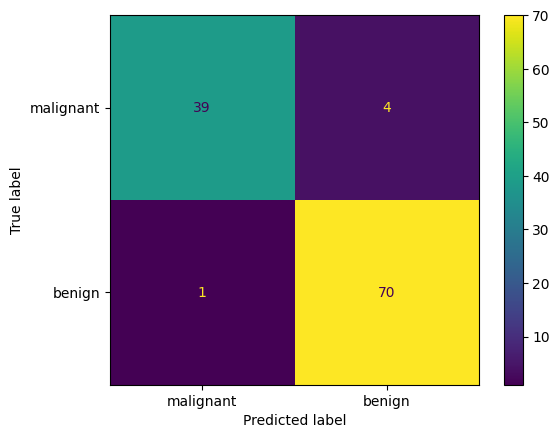

In [16]:
cancer = load_breast_cancer()
X = cancer.data  
y = cancer.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train an SVM model on the training data
model = SVC(kernel='linear') 
#If the linear kernel does not provide satisfactory performance (e.g., low accuracy), you can experiment with other kernels 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cancer.target_names).plot()


In [ ]:
#malignant злокачественный, 

In [18]:
# xercise 3: Decision Tree Classifier
# Objective: Build a decision tree classifier and visualize it.
# Load the Wine dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Train a decision tree classifier on the training set.
# Visualize the decision tree.


Accuracy: 0.94


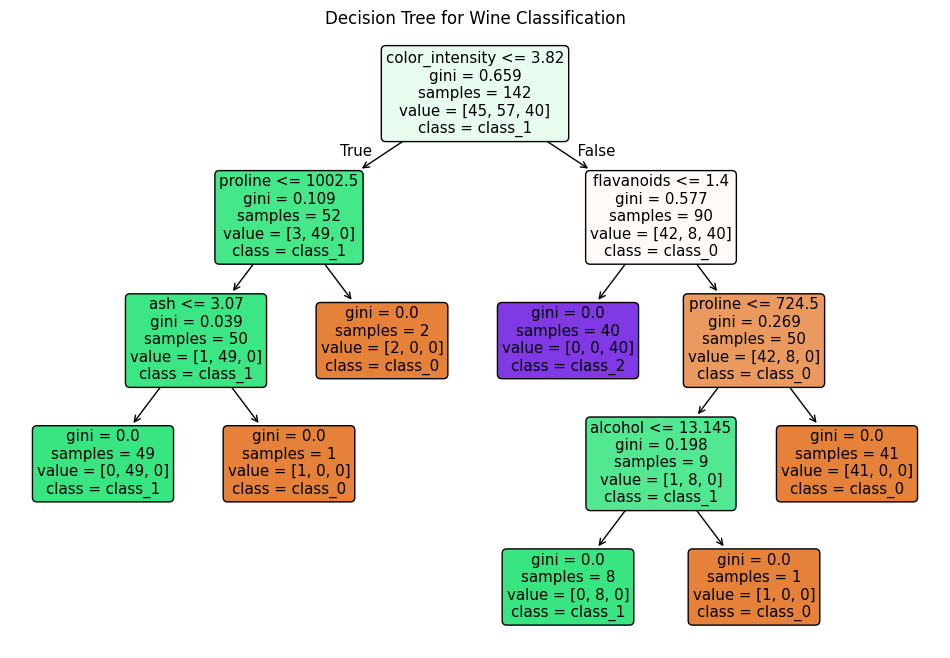

In [19]:
wine = load_wine()
X = wine.data  
y = wine.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=wine.feature_names, class_names=wine.target_names, rounded=True)
plt.title('Decision Tree for Wine Classification')
plt.show()


# Regression Exercises


In [ ]:
# Exercise 1: Linear Regression
# Objective: Build a linear regression model to predict a continuous target variable.
# Load the Boston Housing dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Train a linear regression model on the training set.
# Evaluate the model's performance using mean squared error (MSE) and R-squared score.


In [ ]:
# Mean Squared Error (MSE)=  measure of how close predictions are to 
#the actual values. It calculates the average of the squared differences between predicted and actual values.
#used to evaluate the accuracy of a regression model
#A lower MSE indicates better model performance, meaning predictions are closer to the actual values.

In [ ]:
#(R²) isindicates how well the independent variables in a regression model explain the variability of the dependent variable.
# R² values range from 0 to 1.
# 0 Indicates that the model does not explain any variability.
# 1 Indicates that the model perfectly explains the variability.
# A higher R² value means a better fit of the model to the data.
#For example, an R² of 0.8 means 80% of the variability in the dependent variable is explained by the model.

In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  # Use California Housing dataset as Boston is deprecated
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the California Housing dataset as the Boston dataset is deprecated
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Mean Squared Error: 0.56
R-squared Score: 0.58


In [44]:
# Exercise 2: Ridge Regression
# Objective: Use Ridge regression to perform regularized linear regression.
# Load the Diabetes dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Train a Ridge regression model on the training set.
# Evaluate the model's performance using mean squared error (MSE) and R-squared score.


In [45]:
#  ridge regression(l2) shrinks coefficients but keeps all features,
#while lasso regression(l1) can eliminate some features entirely by 
#setting their coefficients to zero. The choice between the two often
#depends on the specific goals of your analysis (e.g., whether you want to retain all features or simplify the model).

In [46]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 3077.42
R-squared Score: 0.42


In [ ]:
# Exercise 3: Decision Tree Regression
# Objective: Build a decision tree regression model and visualize it.
# Load the Boston Housing dataset from scikit-learn.
# Split the dataset into training and testing sets.
# Train a decision tree regressor on the training set.
# Evaluate the model's performance using mean squared error (MSE).
# Visualize the decision tree.


In [ ]:
# Load the California Housing dataset
from sklearn.tree import DecisionTreeRegressor, plot_tree
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=data.feature_names, fontsize=10)
plt.title("Decision Tree Regression")
plt.show()




Mean Squared Error: 0.50
